# Probability

Based on Geoff Gordon's [probability lecture notes](https://qna.cs.cmu.edu/#/pages/view/168), [Random variables lecture notes](https://qna.cs.cmu.edu/#/pages/view/171), [Mean and Variance lecture notes](https://qna.cs.cmu.edu/#/pages/view/173), [Factorizing distributions lecture notes](https://qna.cs.cmu.edu/#/pages/view/174) and [Matt Gormley's Slides](http://www.cs.cmu.edu/~mgormley/courses/606-607-f18/slides606/lecture13-final.pdf).


# Random Variables


### Probability tables

$$\begin{array}{c|c} a &p(\{a\}) \\ \hline 
5'3''& 0.08\\
5'4''& 0.105\\
\vdots & \vdots \end{array}$$

### Joint distribution

We can have multiple random variables in the same experiment. The universe then corresponds to the set of all possible joint settings of the different variable. Each atomic event is a setting for one of the variables. For example, 
$$\text{height} = \text{5'3"}  \wedge \text{eye color} = \text{brown},$$
is an atomic event.

We can write the probability table by using multiple dimentions:

$$\begin{array}{c|ccc} & \text{brown} & \text{blue} & \text{green} \\ \hline 5'3'' & .05 & .02 & .01 \\ 5'4'' & .06 & .025  & .02\\ \vdots & & \vdots & \end{array}$$

We can also write the probability table as a list to avoid dealing with more than 2 dimensions:

$$\begin{array}{cc|c} \text{height}  & \text{eye color} & P \\ \hline 5'3''  & \text{brown} & .03 \\ 5'3'' & \text{blue} & .02 \\ 5'3'' &  \text{green} & .01 \\ & \vdots & \vdots \end{array}$$

### Marginal distribution

Given a joint distribution over multiple random variables, the dsitribution for a subset of variables is called the marginal and is obtained by marginalizing out the other variables. For each configuration of the variables we want to keep, we sum the probabilities over all the variables we want to marginalize out. 

For example, to obtain the marginal distribution for height, we sum over the three eye colors for each height value:

$$\begin{array}{cccc} 5'3'' & .08 \\ 5'4'' & .105 \\ \vdots & \vdots \end{array}$$

### Conditional distribution

A conditional distribution corresponds to fixing the probability of a subset of variables when fixing the value of another set of variables. To obtain it, we keep the values in the table that are consistent with the variables we fix the values for, then we normalize the remaining entries by the sum of these entries.

For example, the conditional distibution of eye color given a height of $5'3''$ is:
$$\begin{array}{ccc} \text{brown} & \text{blue} & \text{green} \\  .625 & .25 & .125 \end{array}$$

We write conditional distrubtions of $X$ and $Y$ given $Z$ and $W$ as $P(X,Y|Z,W)$. We can write:  $P(X=x,Y=y|Z=z,W=w)$ for specific values $x$, $y$, $z$ and $w$. If we don't, then we have a table (in this case a 4D table). 

### Exercise

From [notes](https://qna.cs.cmu.edu/#/pages/view/171):
"Suppose we have three random variables:

$X\in\{1,2\}$, $Y\in\{1,2,3\}$, $Z\in\{1,2,3,4,5\}$.
Build a joint probability table according to the following rule:

$P(X,Y,Z)=(X+Y+Z)\nu$

Solve for the normalizing factor $\nu$ using the rule that $\sum_X\sum_Y\sum_Z P(X,Y,Z)=1$.

What is the probability of the event $Y=2$?

Now condition on $Y=2$ to get a table of $P(X,Z∣Y=2)$.

What is the probability that $Z\ge 4$ given $Y=2$?

In [1]:
import numpy as np

P_XYZ = np.zeros((2,3,5))

for X in range(2):
    for Y in range(3):
        for Z in range(5):
            P_XYZ[X,Y,Z] = (X+1) + (Y+1) + (Z+1)
            
print(P_XYZ.sum())

195.0


In [6]:
P_XYZ = P_XYZ/np.sum(P_XYZ)

print(P_XYZ.shape)
print(P_XYZ)

P_XYZ[0,1,2]

P_XY = P_XYZ.sum(axis=2)

print(P_XY)

P_Y = P_XY.sum(axis=0)
print(P_Y)

(2, 3, 5)
[[[0.01538462 0.02051282 0.02564103 0.03076923 0.03589744]
  [0.02051282 0.02564103 0.03076923 0.03589744 0.04102564]
  [0.02564103 0.03076923 0.03589744 0.04102564 0.04615385]]

 [[0.02051282 0.02564103 0.03076923 0.03589744 0.04102564]
  [0.02564103 0.03076923 0.03589744 0.04102564 0.04615385]
  [0.03076923 0.03589744 0.04102564 0.04615385 0.05128205]]]
[[0.12820513 0.15384615 0.17948718]
 [0.15384615 0.17948718 0.20512821]]
[0.28205128 0.33333333 0.38461538]


In [9]:
# P(X,Y=2,Z)
P_X2Z = P_XYZ[:,1,:]
print(P_X2Z)

# P(X,Z|Y=2)
P_XZ_Y2 = P_X2Z/np.sum(P_X2Z) 

print(P_XZ_Y2)


[[0.02051282 0.02564103 0.03076923 0.03589744 0.04102564]
 [0.02564103 0.03076923 0.03589744 0.04102564 0.04615385]]
[[0.06153846 0.07692308 0.09230769 0.10769231 0.12307692]
 [0.07692308 0.09230769 0.10769231 0.12307692 0.13846154]]
0.9999999999999998


In [11]:
P_XZ_Y2 # P(X,Z|Y=2)
np.sum(P_XZ_Y2[:,3:])

0.4923076923076922

### Independence and conditional independence

Two variables are independent if and only if their joint distribution factors:

$$P(X,Y) = P(X)P(Y)$$

Two variables $x$ and $y$ are conditionally independent given $z$ if and only if their conditional joint distribution factors:

$$P(X,Y\mid Z) = P(X\mid Z)P(Y\mid Z)$$


### The chain rule (probability)

$$P(A,B) = P(A|B)P(B)$$

(to compute conditional dsitributions such as $ P(A|B)$ above, we computed $P(A\mid B) = P(A,B)/P(B)$

We can use the chain rule on multiple variables:

$P(A,B,C) = P(A\mid B,C)P(B,C) = P(A\mid B,C)P(B\mid C)P(C)$

### Bayes rule

From the chain rule, we have:

$P(A\mid B)\, P(B) = P(A, B) = P(B\mid A)\, P(A)\,.$

Dividing by P(B):

$$P(A\mid B) = \frac{P(B\mid A)\, P(A)\, }{ P(B)\,}.$$


Sometimes we need to also condition on side information (e.g. the value of specific parameters), and we can use the general form:

$$P(A\mid B, C) = \frac{P(B\mid A, C)\, P(A,C)\, }{ P(B,C)\,}.$$



### Factorizing joint distributions

What happens if we have a large number of variable? The tables are exponentially large. Luckily, knowledge about the relationships between the variables allows us to simplify the joint distribution.

[Example from notes](https://qna.cs.cmu.edu/#/pages/view/174)

"
- O: whether our robot is Outside
- M: whether our robot is made of Metal
- R: whether it is Raining
- W: whether our robot is Wet
- U: whether our robot is rUsty

The joint table has 32 entries. But, if we represent it in factored form as

$$P(O,M,R,W,U)=P(O)P(M)P(R)P(W∣O,R)P(U∣W,M)$$

then the individual tables have 2+2+2+8+8=22 entries total."

Example:
$$P(O) = \left[\begin{array}{c} .45 \\ .55 \end{array}\right]\qquad P(W\mid O, R) = \left[\begin{array}{cc}.9 & .05 \\ .1 & .05 \\ \hline .1 & .95\\ .9 & .95 \end{array}\right]\,.$$


### Exercice:

[Exercise from notes](https://qna.cs.cmu.edu/#/pages/view/174)

"For example, suppose we are given the following tables relating **G=grass is wet** to **S=sprinkler is on**:

$$P(S) = \left[\begin{array}{c} 1\over 3 \\ 2\over 3\end{array}\right] \qquad P(G\mid S) =\left[\begin{array}{cc} 3\over 4 & 1\over 5 \\ 1\over 4 & 4\over 5\end{array}\right]$$

(Here we are following the convention that the first random variable that appears in an expression corresponds to the rows of a table, while the second corresponds to columns.)

Use Bayes' rule to find:

$$P(S \mid G) = \left[\begin{array}{cc} \_ &\_ \\ \_&\_ \end{array}\right]$$

Hint: we aren't given P(G), but that's OK; we can find it by noting that each column of the desired table is a probability distribution and so has to sum to 1. "

## Mean and Variance

The mean of a variable, also called it's expected value or first moment, is defined as:

For discrete $X$:

$$\textstyle E[X] = \sum_x x\cdot P(X=x)\,.$$

For continuous $X$ with pdf $f(X)$:

$$\textstyle E[X]=  \int x f(x)dx$$

#### Functions of $X$:

The expected value of $g(X)$ is:

For discrete $X$:
$$\textstyle E[g(X)] = \sum_x g(x)\cdot P(X=x)\,.$$

For continuous $X$:
$$E[g(X)] = \int g(x) f(x)dx$$

#### Linearity of expectations:

If $a$ and $b$ are constants:

$$E[aX+b] = aE[X]+b$$

#### Variance:

The variance of $X$ is defined as:

$$var(X) = E[(X- E[X])^2]$$

It can also be obtained from:

$$var(X) =  E[X^2] - E[X]^2$$

Proof:
\begin{align*}
    var(X) &= E[(X-E[X])^2]\\
&= E[X^2-2XE[X]+E[X]^2]\\
&= E[X^2]-2E[XE[X]]+E[E[X]^2]\\
&= E[X^2]-2E[X]E[X]+E[X]^2\\
&= E[X^2]-E[X]^2\\
\end{align*}

The mean and variance can also be obtained from the moment generating function.

#### Moment generating function:

\begin{align*}
    M_{X} (t) = E[e^{tX}]
\end{align*}

- $E[X^n] = M^{(n)}(0) = \frac{\partial^n M_X}{\partial t^n}\big|_{t=0}$
- $E[X] = M'(0)$
- $E[X^2] = M''(0)$
- $var(X) = E[X^2]-E[X]^2 = M''(0) - M'(0)^2$

##### Example: 

Bernouilli: $P(X=1)=p$

$M_{X} (t) = E[e^{tX}] = \sum_{x=0}^1 e^{tx} P(X=x) = 1-p+pe^{t}$

$M'_{X}(t) = pe^{t}$

$E[X] = M'(0) = p$

$M''_{X}(t) = pe^{t}$

$E[X^2] = M''(0) = p$

$var(X) = M''(0) - M'(0)^2 = p - p^2 = p (1-p)$


### Standardizing

If $X$ has mean $\mu$ and variance $\sigma^2$, then we can define a new variable $Z$ with mean $0$ and variance $1$ by computing:

$$Z=\frac{X-\mu}{\sigma}$$

This is done in python using the function `scipy.stats.zscore`


### Covariance and correlation

Given random variables $X$ and $Y$, their covariance is defined as:

$$\text{Cov}(X, Y) = E[(X-\bar X)\,(Y-\bar Y)]\,.$$

If we first standardize $X$ and $Y$, we obtain the correlation, which reflects the degree with which $X$ and $Y$ vary together irrespective of their magnitudes:

$$\text{Corr}(X, Y) = E\left[{X-\bar X\over \sigma_X} \, {Y-\bar Y\over \sigma_Y}\right]$$


### Uncorrelated vs. independent

Two independent variables are uncorrelated, but two uncorrelated variables can still be dependent.  


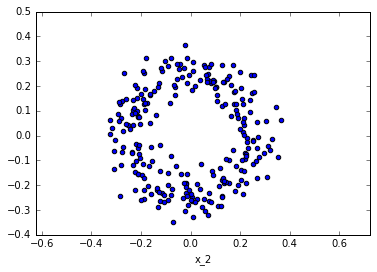

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

X, y = datasets.make_circles(n_samples=500, factor=.25,
                                      noise=.05,)
X = X[y==1]
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');
plt.xlabel('x_1')
plt.xlabel('x_2')

In [21]:
from scipy.stats import zscore

def corr(X,Y):
    zX = zscore(X)
    zY = zscore(Y)
    return np.mean(zX*zY)

print(corr(X[:,0],X[:,1]))

-0.00750354795897
